# GP2 Tutorial - Module 2 - Introduction to current AMP and GP2 data and managing costs

`GP2 ❤️ Open Science 😍`

- **Module:** Introduction to current AMP and GP2 data and managing costs
- **Authors:** Sara Bandres-Ciga, Hampton Leonard, and Mary Makarious on behalf of the Global Parkinson's Genetics Program
- **Estimated Computation and Runtime:** xx
    - **Estimated Specifications:** xx
    - **Estimated Runtime:** xx
- **Date Last Updated:** 08-MARCH-2022
    - **Update Description:** Started notebook
    
---
### Quick Description: 
These notebooks serve as a beginner's introduction to Terra, GP2, and AMP-PD data to help you get comfortable navigating the spaces, manage your costs, upload your own data, and begin running some simple analyses.


### Course Summary:
- **Module 1:** Intro + demo Terra 
- **Module 2:** Introduction to current AMP and GP2 data + managing costs **(this notebook!)**
- **Module 3:** How to upload, access, and copy over data 
- **Module 4:** How to interact with clinical data + make mini covariate files 
- **Module 5:** Analysis example 1: Run PRS with PD known hits in Non-Euro pops and data viz + save results
- **Module 6:** Analysis example 2: How to extract a gene, annotate it, run burden, and get hmz and compound hets + save results
- **Module 7:** WDL workflows: What they are + When to use + Quick example overview

---
## Workflow:

## Notebook Summary 
- Managing annd understanding costs
- GP2 data details

### [Managing Costs](#1)
This section goes through: 
- Billing projects
- Billing on the Google Cloud Platform (GCP) 
- Cost breakdown 
- Cost management best practices


### [GP2 Data Details](#3)
This section goes through: 
- Whats's available in the first release and how it was QC'd
- Important things to be aware of 



# Managing Costs

## Billing Projects

Before setting up a Terra billing project, you will need to create a Google billing account. Start here: https://console.cloud.google.com/billing?pli=1 

Then select 'Create Account' and follow the instructions.

Next, add terra-billing@firecloud.org as a Billing Account User:

Go to 'Account Management' under 'Billing' | Select 'Add Principal' and add terra-billing@firecloud.org as a User
--- | ---
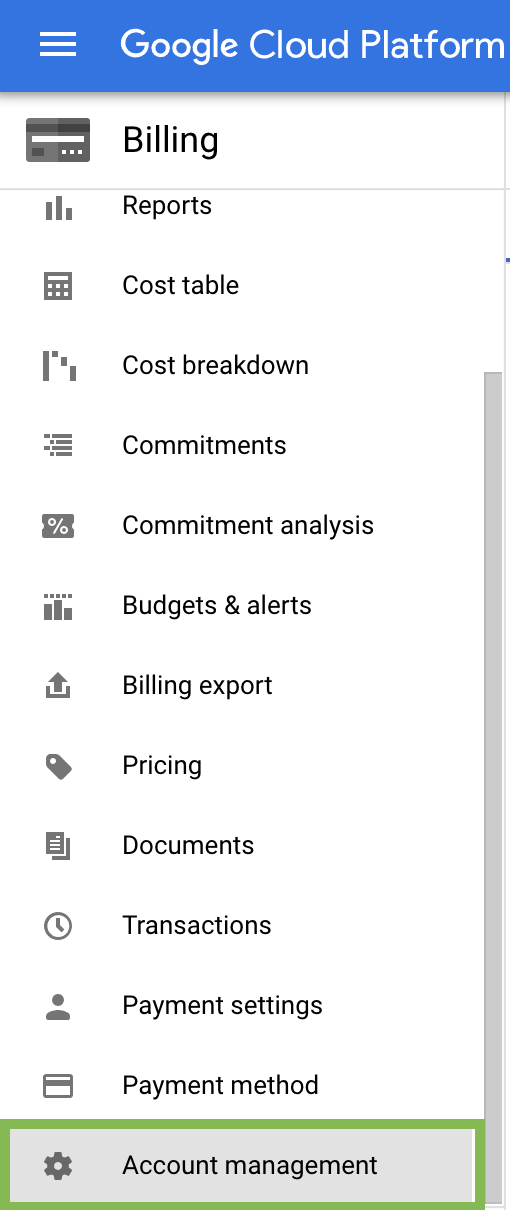 | 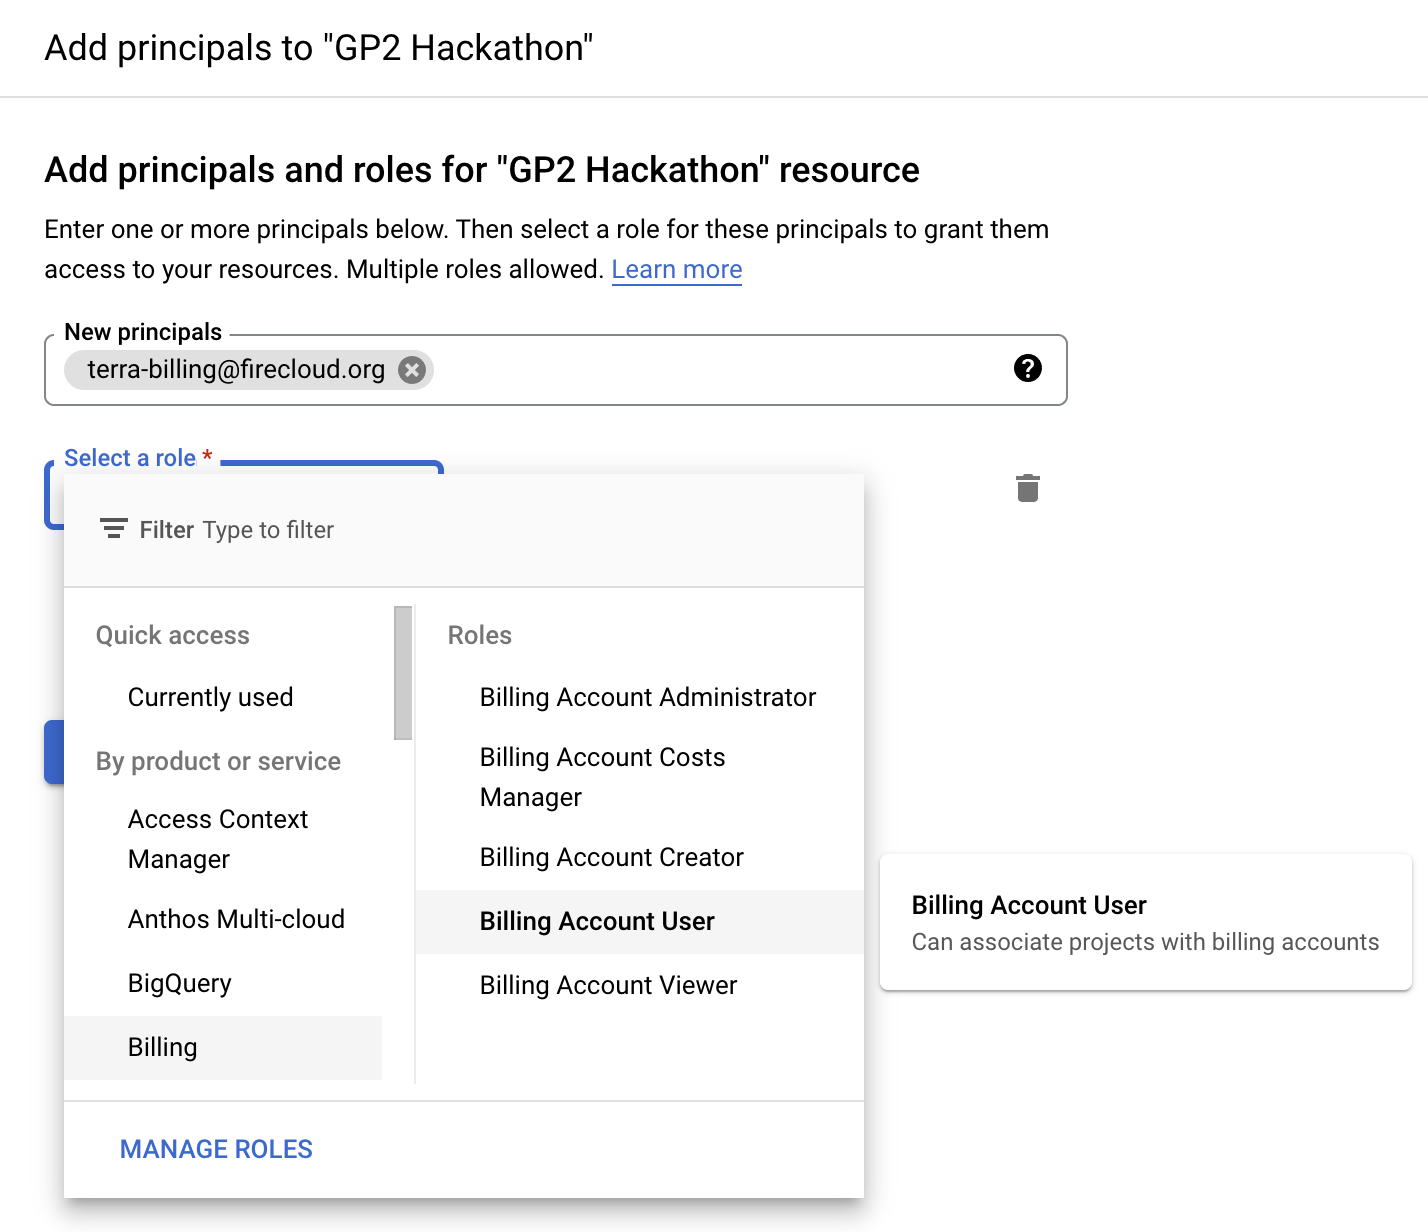

Now you can set up a Terra billing project:

Select 'Billing' | Select '+ Create' and choose a name and the billing project 
--- | ---
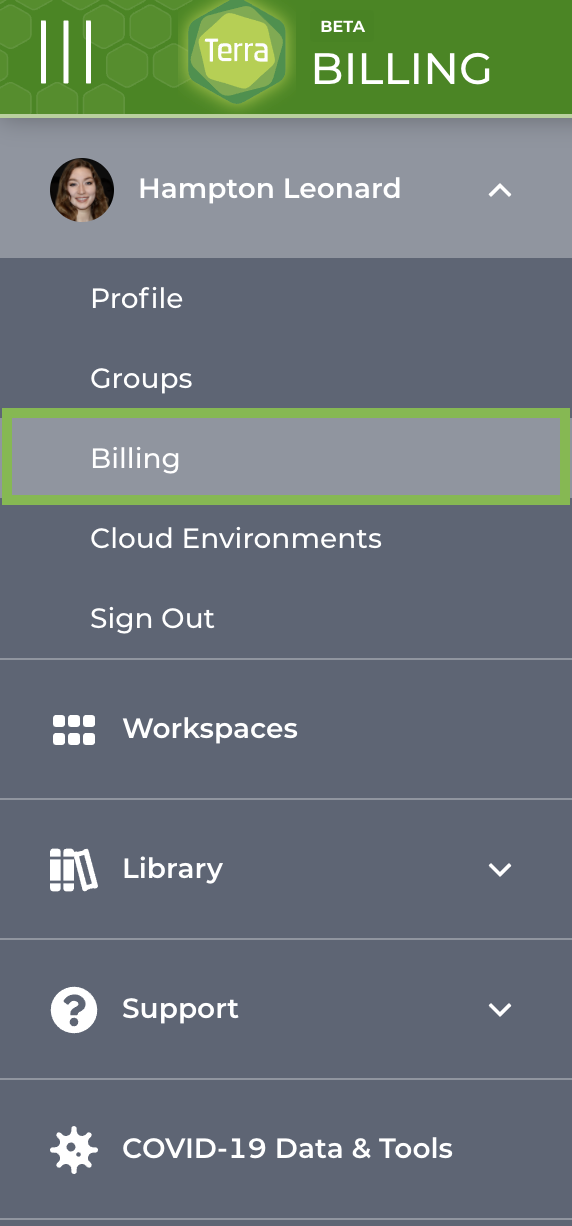 | 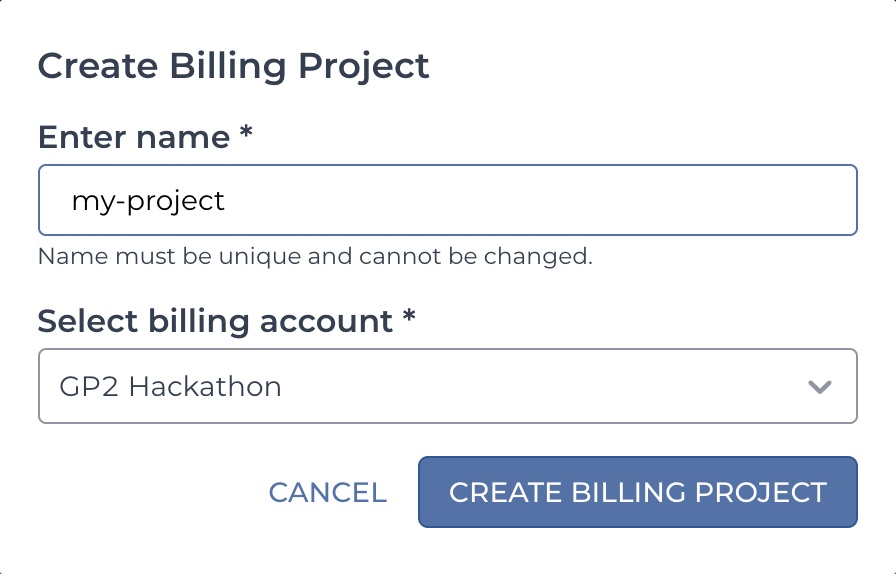

Every Terra project starts with a limit of **5 workspaces per project**. You will not be able to create more unless you request more from Google. You may also need to request quota increases for things like:

- Persistant Disk space
- Number of active VM's
- Number of available CPU's

You can send a request to support@terra.bio with your project information and they will make the request on your behalf.

### Keep track of billing through the Google Cloud Platform

You can keep track of costs per workspace at https://console.cloud.google.com/billing/

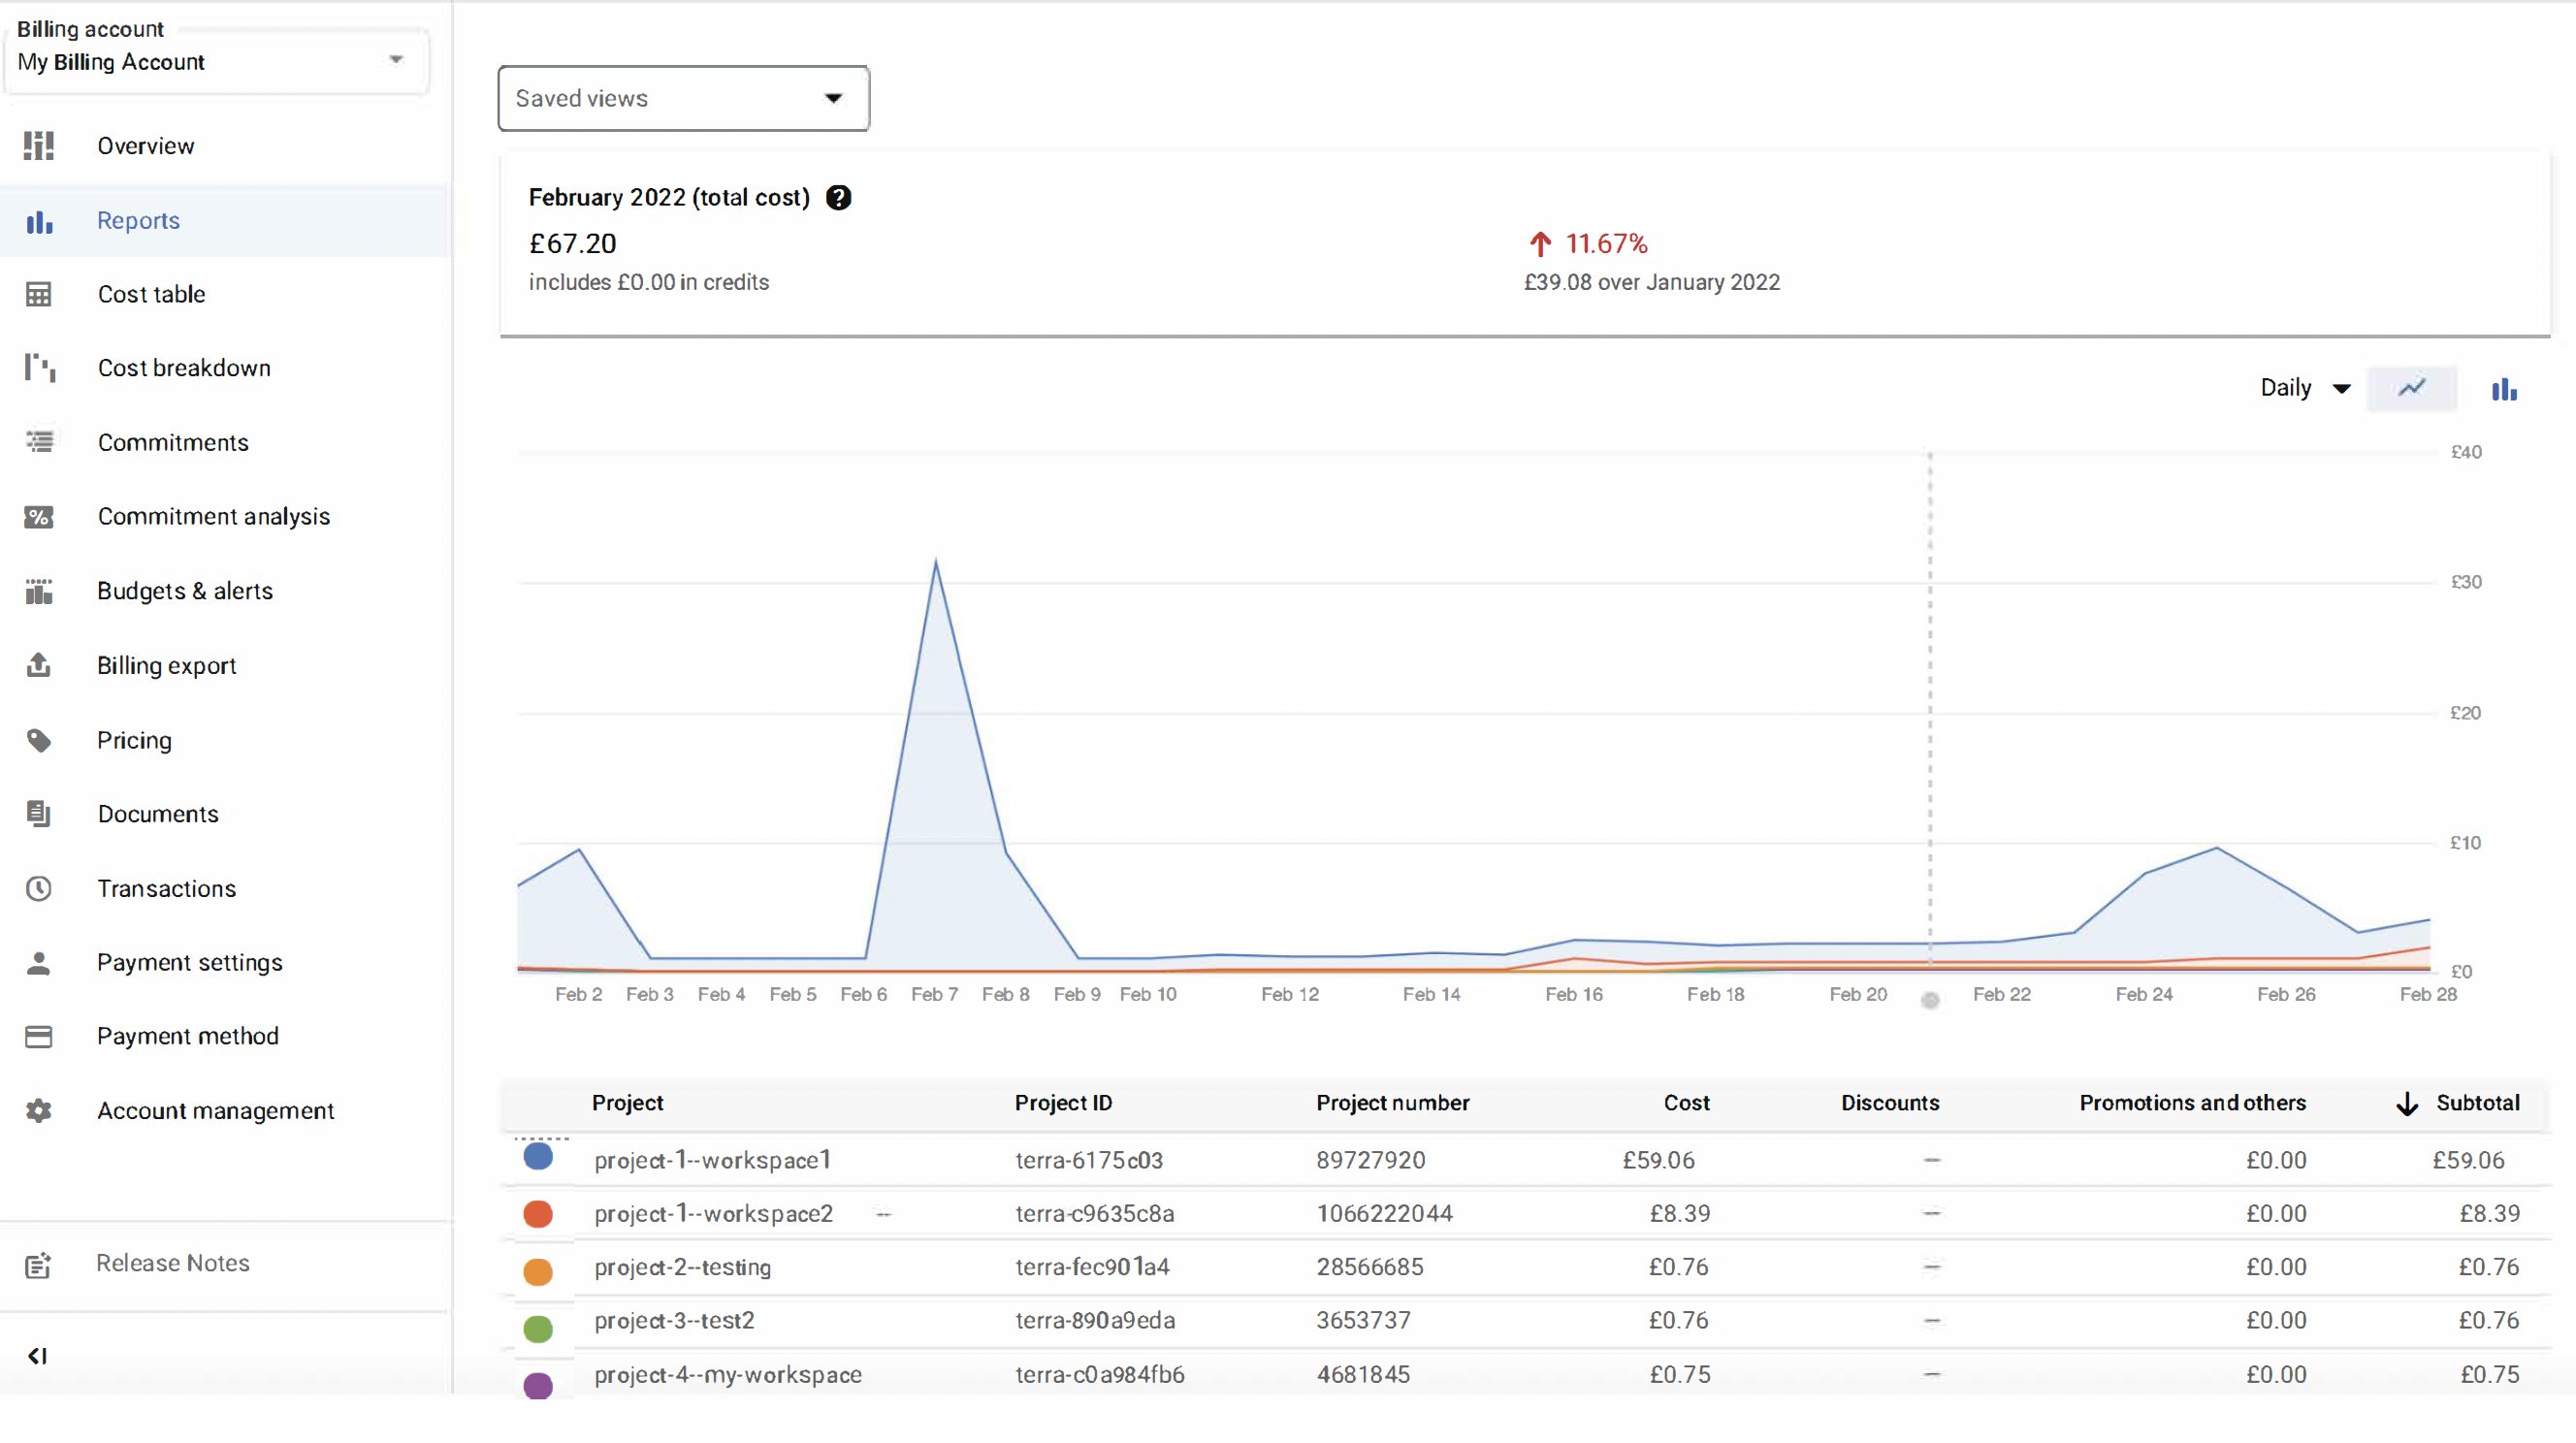

You can also download statements for each billing period if needed by clicking on 'Documents' on the left banner.

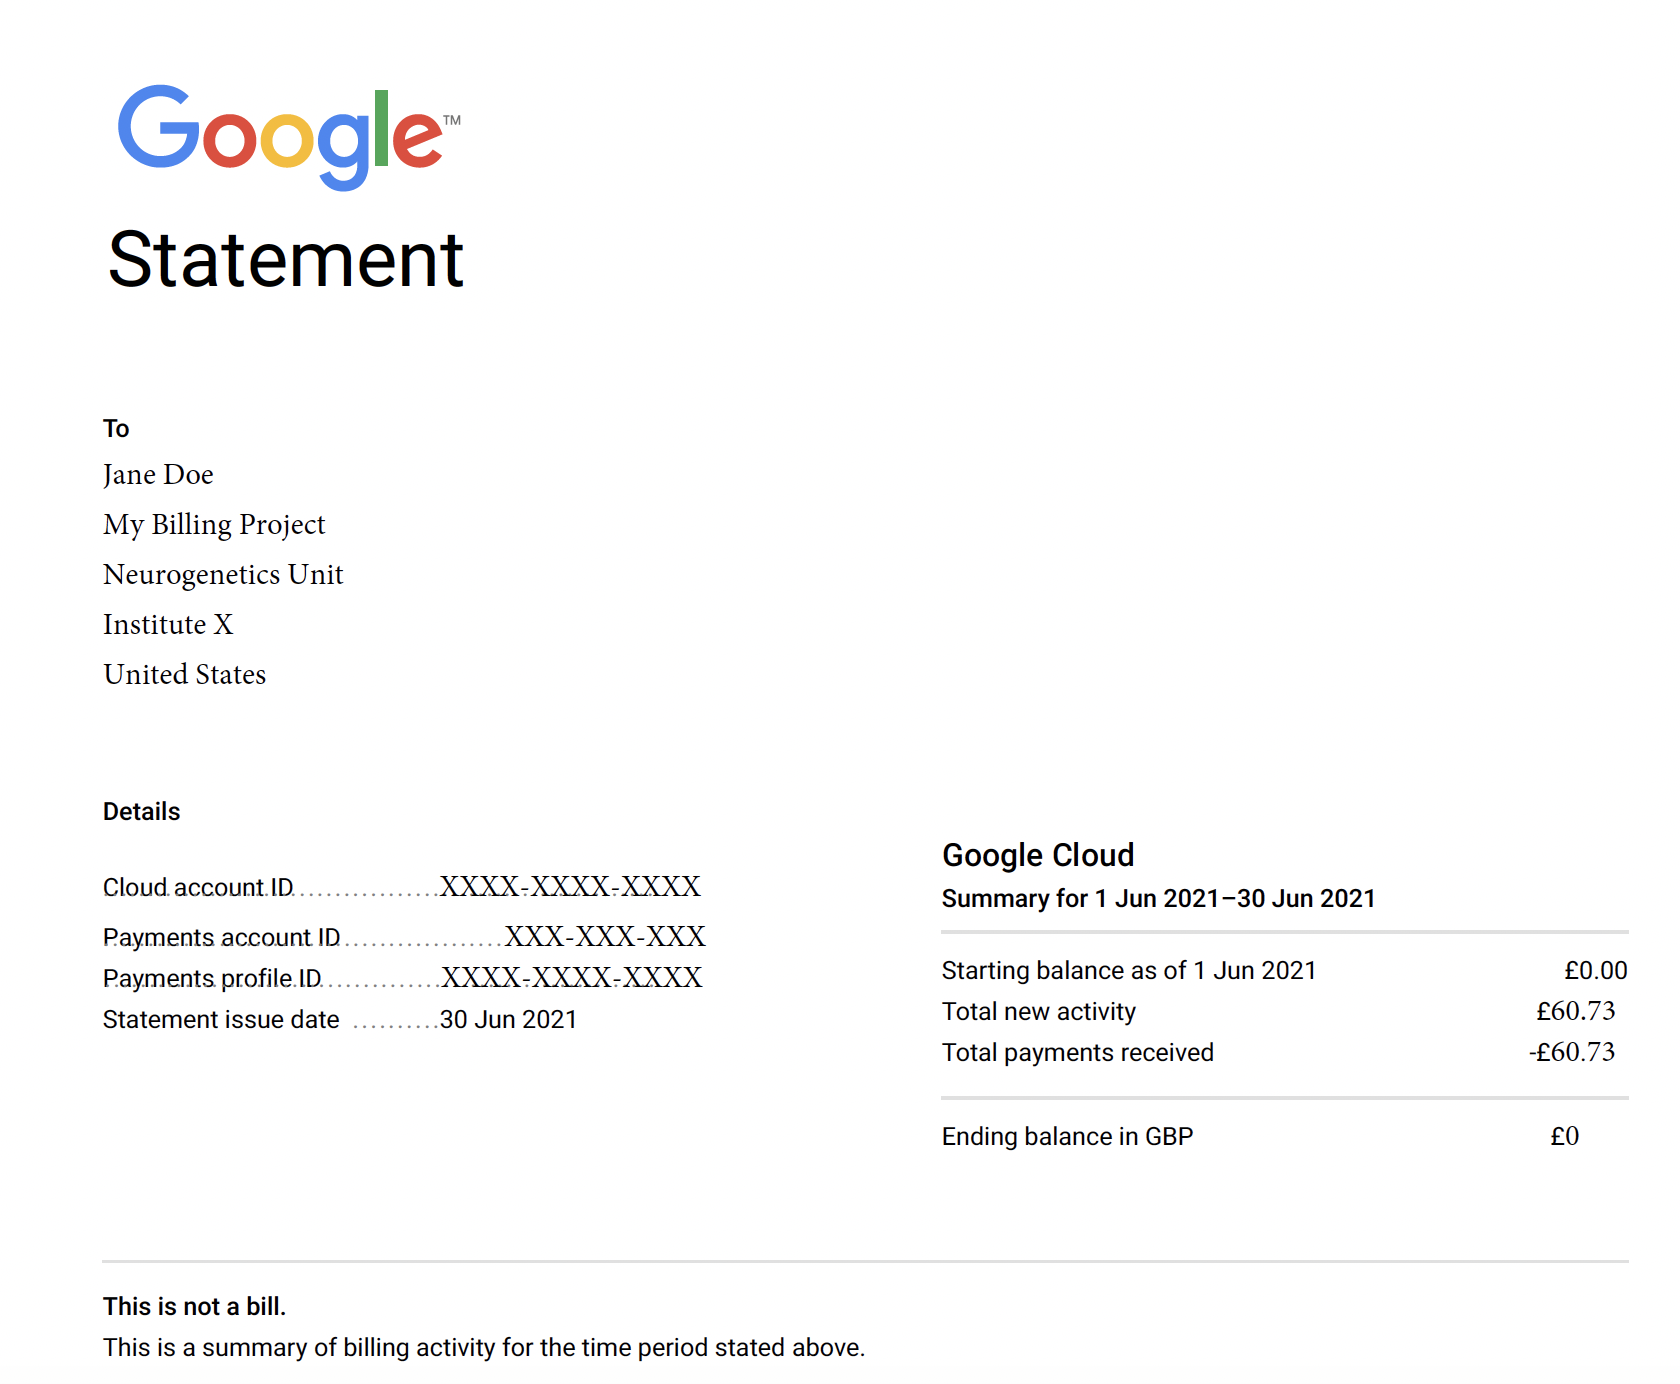

## Create a budget 

One way to keep track of charges is to set up a budget on the GCP.
- Budget for your entire billing project or just for specific projects
- Choose thresholds and send email alerts when they have been reached
- Even options to disable billing if a certain threshold has been reached

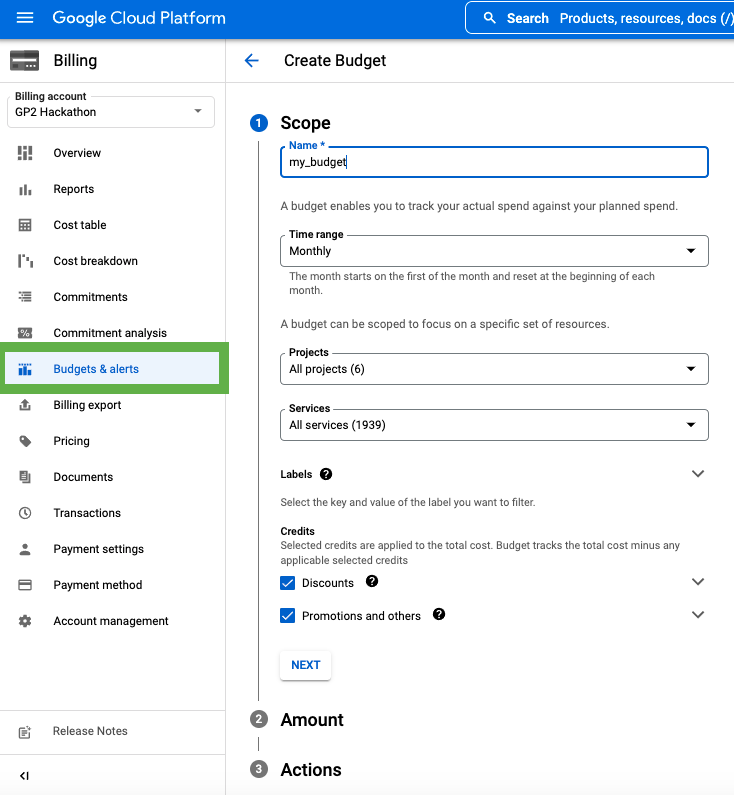

More information on decoding your billing project can be found here: https://support.terra.bio/hc/en-us/articles/4405325218075-Terra-expenses-and-breaking-down-a-Google-bill

## Understanding your VM costs and resources

### Components of your VM
1. CPUs - responsible for carrying out tasks, you can request more of these for more processing power.
2. Memory (GB) - the memory related to carrying out tasks, request more for larger tasks.
3. Persistant Disk size - the memory for the data you move to your VM, the more data you are working with, the more persistan disk size you will want to request.

You can monitor how much your VM will cost as you change these parameters. This is the cost for the default cloud environment.

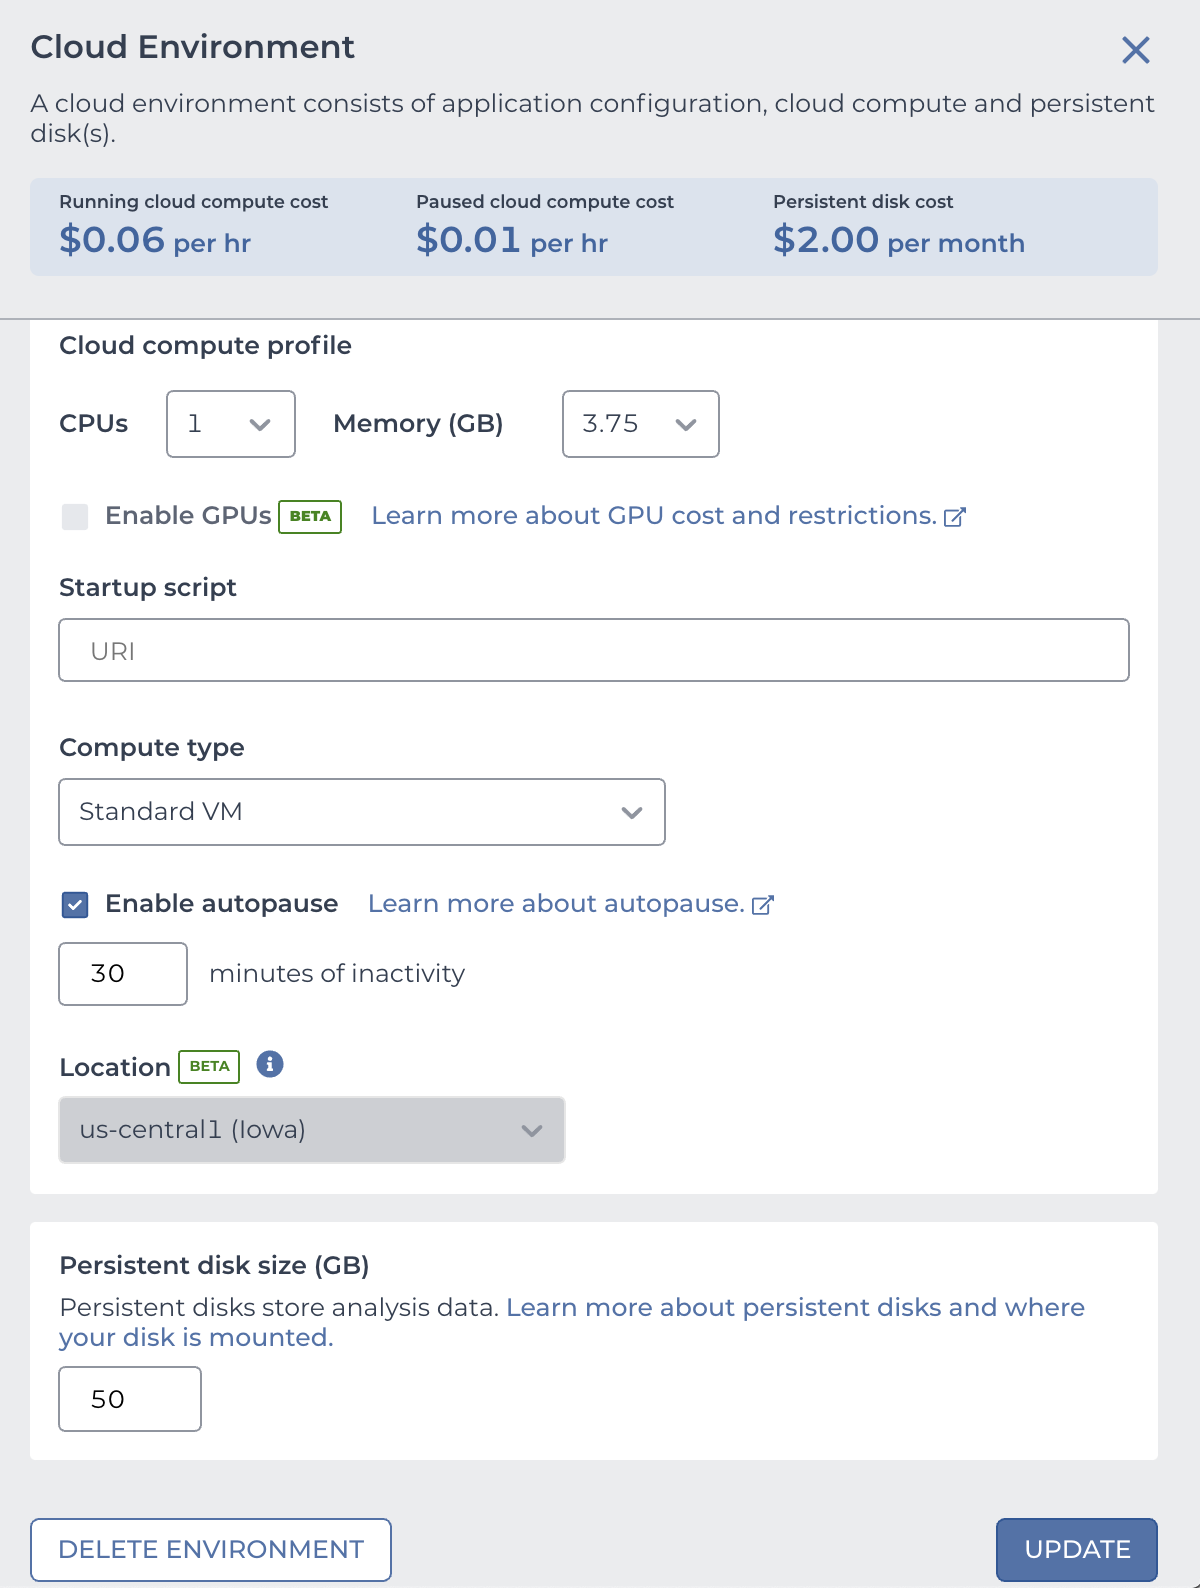

If you increase your memory and CPUs, the price for running the environment will increase. Disk space is calculated per month rather than by per hour and is not affected by the state of the VM (running or paused). For example, increasing CPUs to 2 and Memory (GB) to 13 increases running compute cost to 0.13 per hour and increasing disk space to 100 (GB) increases the persistant disk cost to 4.00 per month.

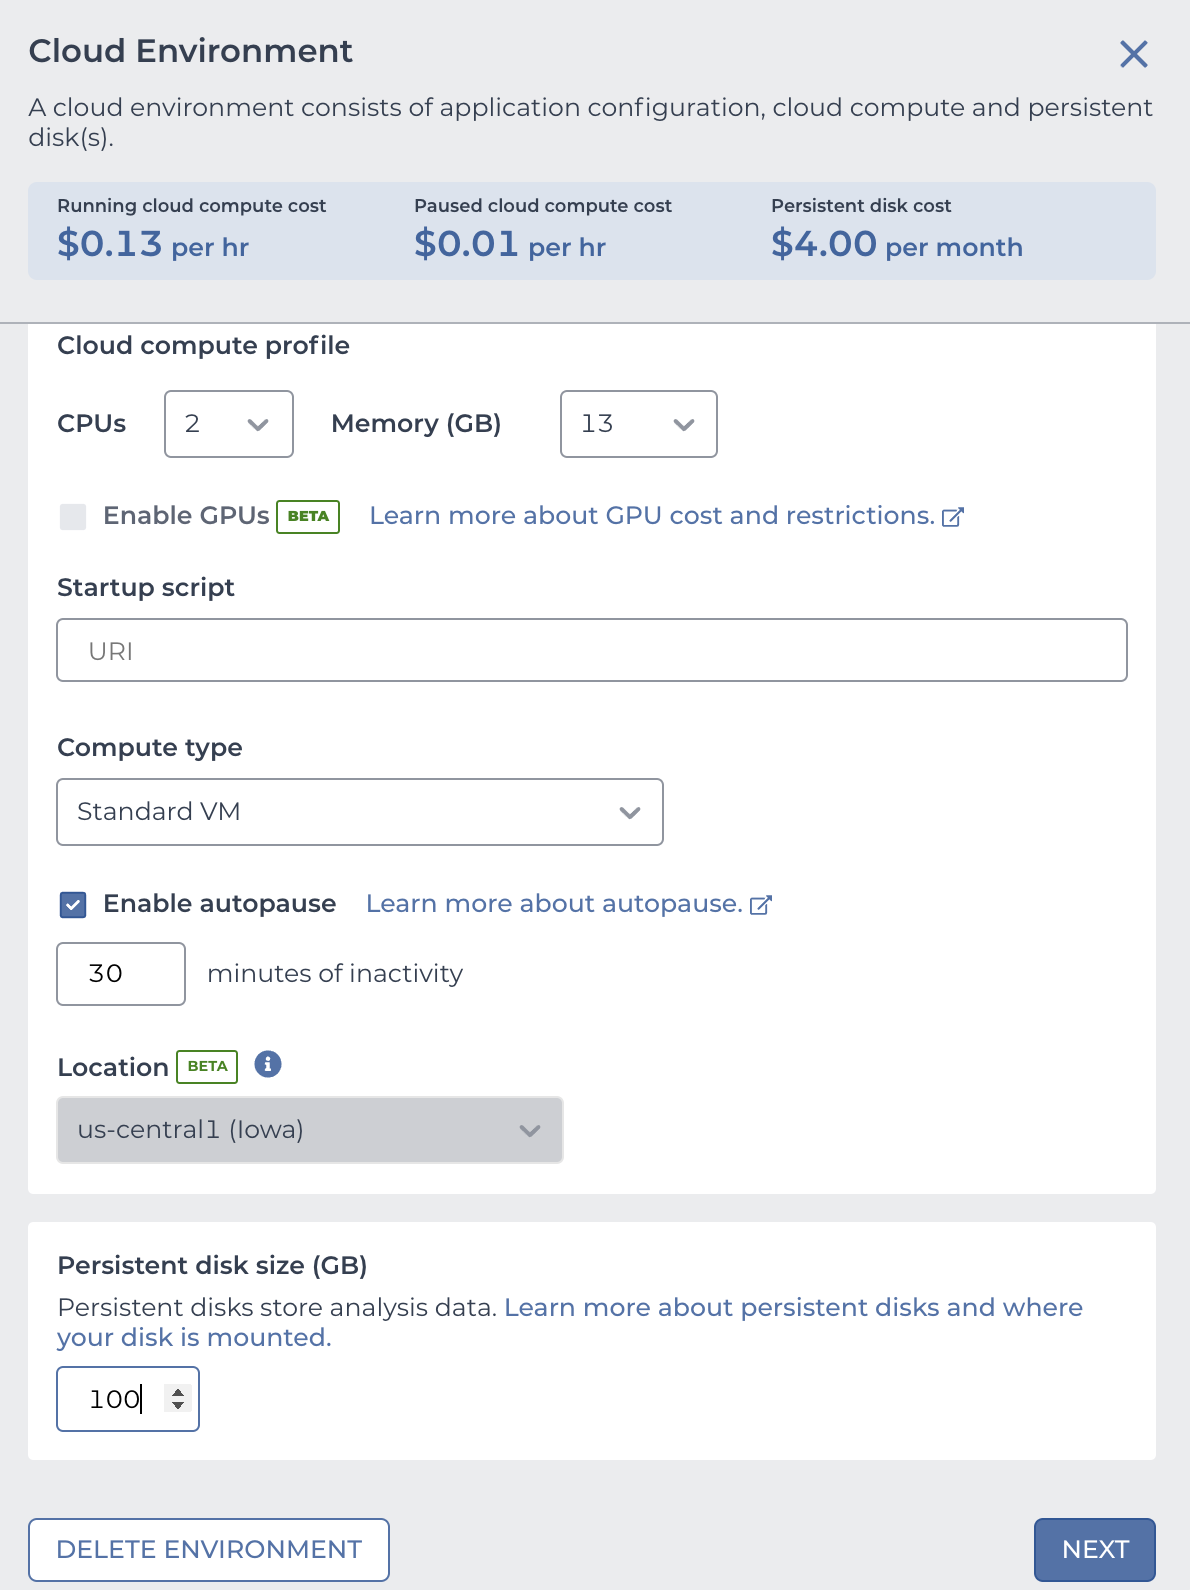

## Cost breakdown - what costs money and what doesn't

**Things that will cost money**
- Persistant disk space, working memory, CPUs (the most expensive resource)
- Storage of data and files that are uploaded or written to your workspace
- Querying BigQuery datasets (like AMP-PD's variant annotation dataset)
- Running workflows
- Moving data from one zone to another, for example:
    - Downloading data from a Google Cloud Storage (GCS) bucket to your laptop
    - Copying data from a bucket in one region to a VM in a different region (us-central to us-west or asia-east to europe-central etc. Typically at the cost of $0.01/GB)

**Things that will not cost money**
- Moving AMP-PD data or current GP2 data to your VM (everything US based right now (multi-regional or us-central))
- Uploading data to you workspace 
- Deleting your VM

## How to keep costs low

### Notebooks
1. Only request the resources you need - CPU's are expensive and a lot of persistant disk space will cost money if left for a long time
    - If you find you are running out of persistant disk space make sure you are storing data in the correct place: **/home/jupyter**
2. Make sure your VM is in the same location as the data you want to use
    - Not a huge concern right now, but eventually GP2 data from other locations will be made available. You will want a European VM for data in a European bucket
3. Delete your VMs when done!
    - It's alway a good idea to delete your VM if you know you won't be using it for a while. You have the option of keeping your persistant disk so that the data you moved to your VM won't be deleted, but you will still pay for the persistant disk space unless you choose to delete everything.


### Workflows 
1. Consider using preemtible VMs
    - Preemtible VMs are much more cost effective than standard VMs because they are 'taken away' from you when someone else requests them. However if you are running short tasks with checkpoints, this can be a very useful way to save costs.
2. Use a cost estimation notebook to prevent surprises 
    - Workflows provide a final cost after they have completed but it's a good idea to estimate how much it will cost beforehand. You can do that using this notebook: https://app.terra.bio/#workspaces/biodata-catalyst/BioData%20Catalyst%20Collection/notebooks/launch/Workflow%20Cost%20Estimator.ipynb


### Data

1. Be careful of storage!
    - Whatever you write or upload to your workspace bucket will cost money for storage. Only write larger files there if needed, when you're ready to download, or when you are deleting your VM and persistant disk and need to save files to your workspace.
2. Be careful downloading!
    - Downloading data costs money - never download GP2 or AMP-PD data to your laptop. Terra will give an estimate for how much it will cost to download a chosen file from your workspace bucket. 


### Querying
1. Be careful querying!
    - Not relevant for GP2, but if you are interested in AMP-PD's variant annotation dataset there are resources available to help you use querying best practices: https://cloud.google.com/bigquery/docs/best-practices-costs and https://app.terra.bio/#workspaces/amp-pd-release-v2-5/Getting%20Started%20Tier%202%20-%20Clinical%20and%20Omics%20Access/notebooks/launch/Py3%20-%20WGS%20-%20Query%20Variants.ipynb


# GP2 Data Details

## GP2 QC Workflow 

GP2 data is QC'd through the open source tool GenoTools: https://github.com/GP2code/GenoTools

Below details the QC workflow that GP2 data goes through before being released.

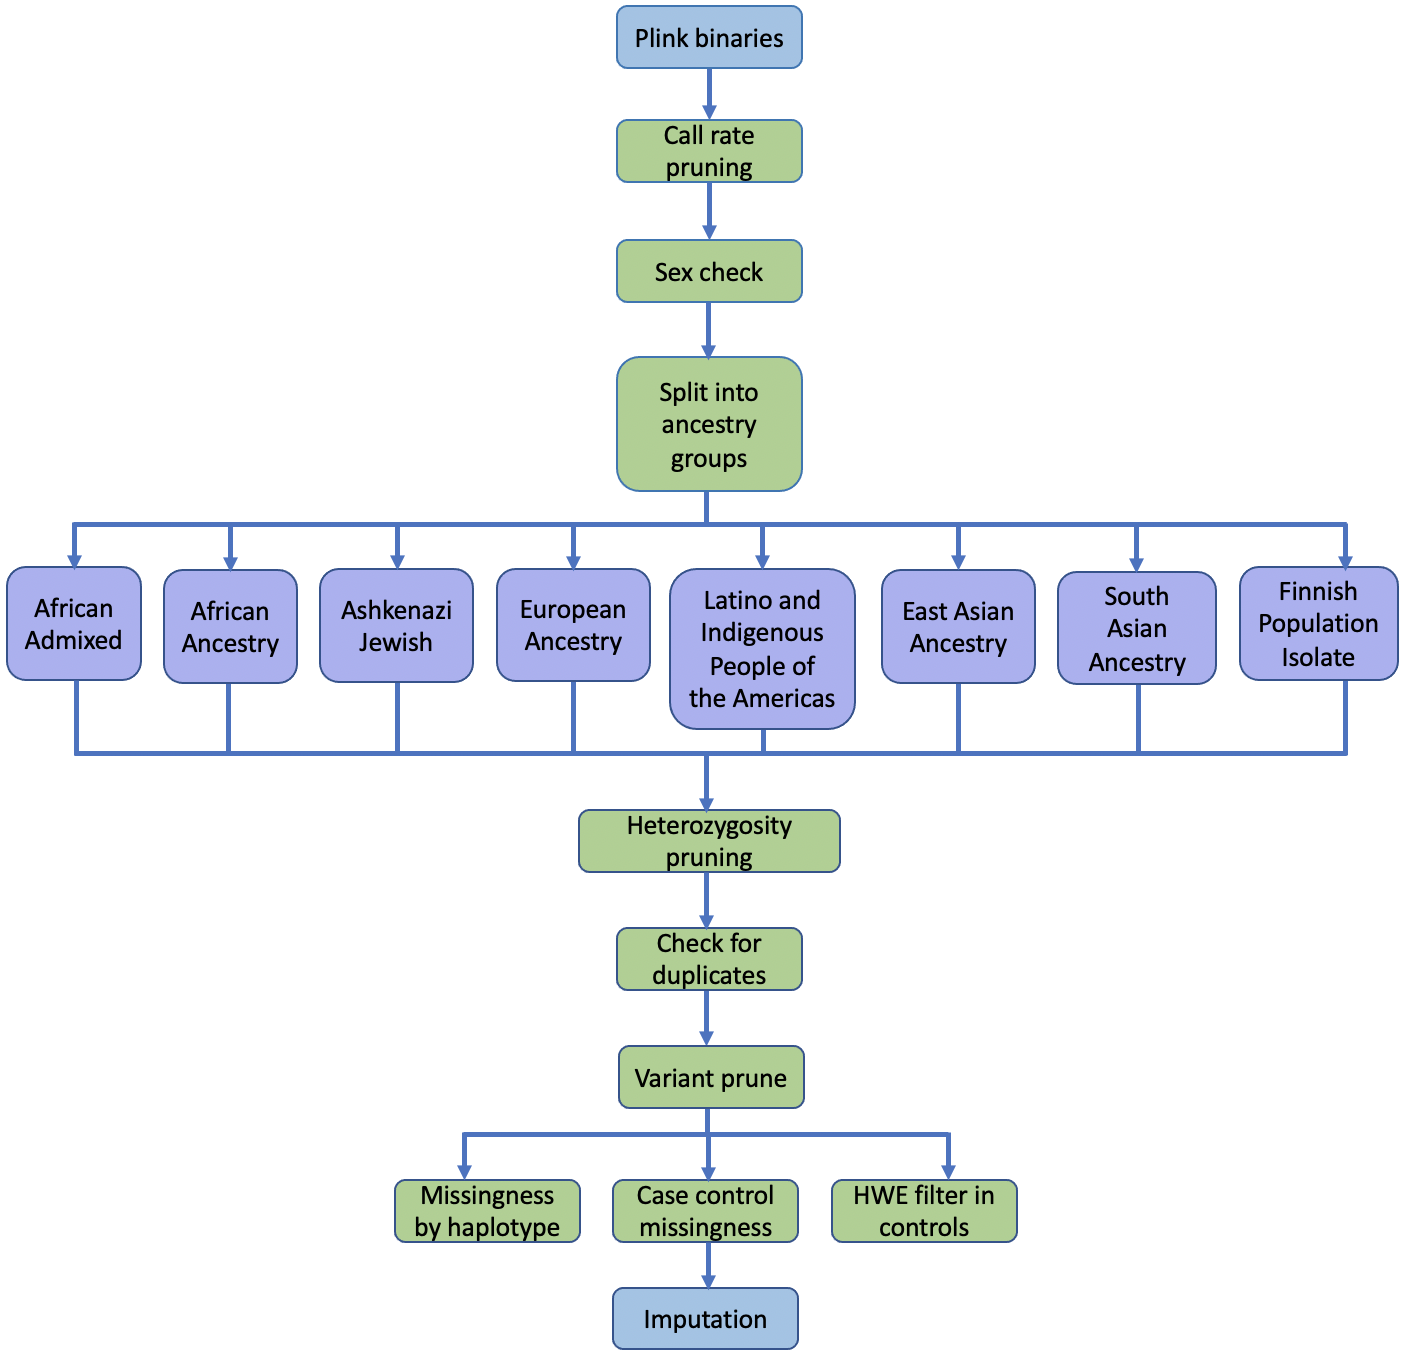

## Clinical Core Data

The Complex Disease Cohort Integration working group harmonizes clinical data to create unified GP2 clinical datasets. Minimal information required is demographics, recruitment category, and family history, but additional data is harmonized if present in any participating cohort.

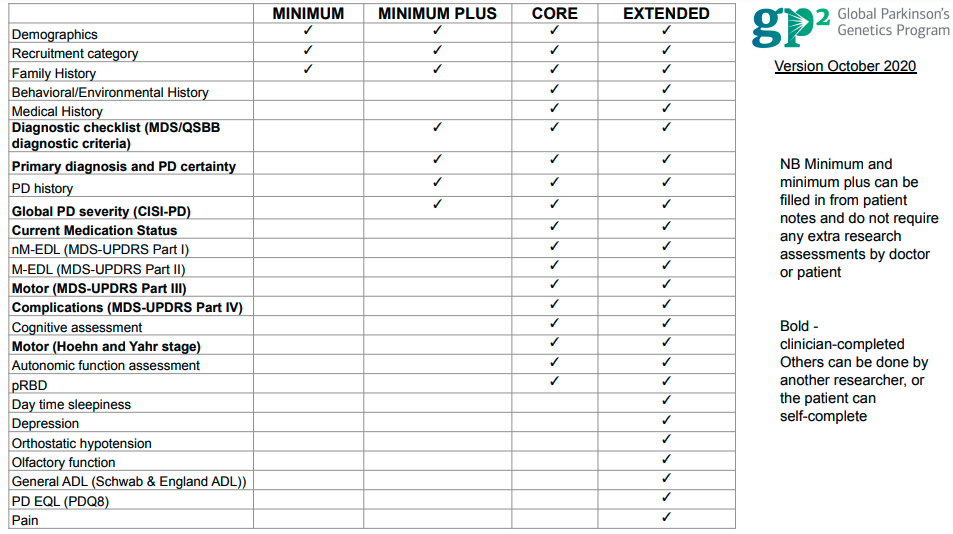

## Second Release

Available imputed data in the second release. 

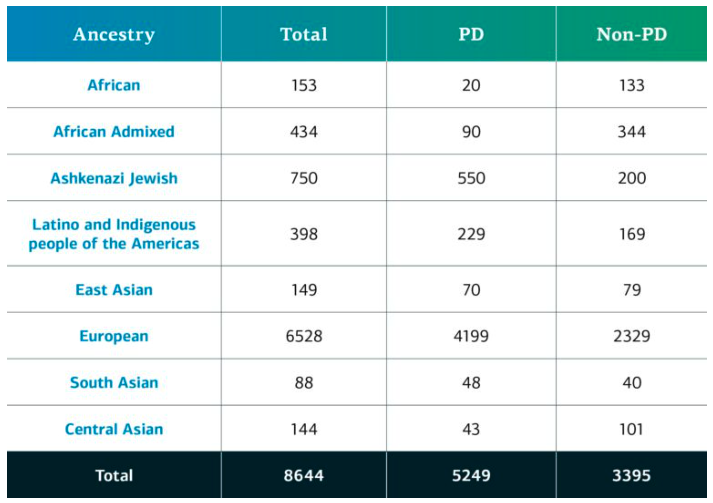

For more information on available data and files, visit the [GP2_Tier1](https://app.terra.bio/#workspaces/cardterra/GP2_Tier1) and [GP2_Tier2](https://app.terra.bio/#workspaces/cardterra/GP2_Tier2) Workspaces.

## Important things to be aware of

1. Sample QC is done and ancestry is split but related people are still present. You will have to filter these or account for relatedness in your analyses. We will be including lists of related particpants in the next release.
2. Don't get confused for this first release if raw and imputed sample numbers don't match - some populations are too small at the moment for reliable imputation. This will be ironed out as we get more samples.